# Práctica 2 Regresión logística

#### Realizado por Javier Gómez Moraleda y Unai Piris Ibañez

In [35]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures

In [36]:
# Función que carga los datos
def carga_csv(file_name):
    valores = read_csv(file_name, header = None).to_numpy()
    return valores.astype(float)

## Parte 1: Regresión logística sin regularizar

In [37]:
# Calcula el valor de la función sigmoide
def sigmoid(X):
    z = 1/(1 + np.exp(-X))
    return z

In [38]:
# Calcula la función de coste
def fun_coste (thetas, X, Y):
    
    H = sigmoid(np.dot(X, thetas))
    Term1 = np.matmul(Y, np.log(H))
    Term2 = np.matmul((1 - Y), np.log(1 - H))
    cost = (- 1 / (len(Y))) * np.sum(Term1 + Term2)
    
    return cost

In [39]:
# Calcula el gradiente
def gradient(thetas, X, Y):
    
    H = sigmoid(np.dot(X, thetas))
    Dif = H - Y
    grad = (1 / len(Y)) * np.matmul(Dif, X)

    return grad

In [40]:
# Calcula la predicción
def predict(X, Y, theta_opt):
    Y_prediccion = np.round(sigmoid(np.dot(X, theta_opt)))
    return Y_prediccion

In [41]:
# Calcula la precisión
def accuracy(Y, Y_prediccion, m):
    return np.sum((Y == np.array(Y_prediccion))) / m

In [42]:
# Dibuja la frontera de decisión 
def pinta_frontera_recta(X, Y, theta):
    plt.figure()
    x1_min, x1_max = X[:, 1].min(), X[:, 2].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 2].max()
    
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))
    
    h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0], 1)),
    xx1.ravel(),
    xx2.ravel()].dot(theta))
    h = h.reshape(xx1.shape)
    
    # el cuarto parámetro es el valor de z cuya frontera se
    # quiere pintar
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
    plt.scatter(X[pos, 1], X[pos, 2], marker ="+", c="k")
    plt.scatter(X[neg, 1], X[neg, 2], marker =".", c="y")
    #plt.savefig("frontera.pdf")
    plt.show()
    plt.close()

### Observando resultados

#### Visualización de los datos

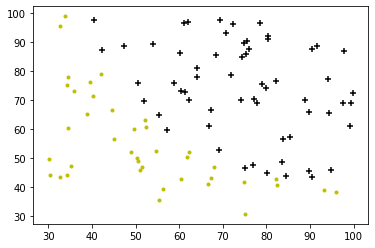

In [43]:
# Cargamos los datos
datos = carga_csv('ex2data1.csv')

# Separamos las variables del resultado
X = datos[:,:-1]
Y = datos[:, -1]

# Añadimos una columna de 1's
X = np.hstack([np.ones([np.shape(X)[0], 1]), X])

# Filas y columnas
m = np.shape(X)[0]
n = np.shape(X)[1]

# Dibuja los ejemplos positivos
pos = np.where (Y == 1)
plt.scatter(X[pos, 1], X[pos, 2], marker='+', c='k' )

# Dibuja los ejemplos negativos
neg = np.where (Y == 0)
plt.scatter(X[neg, 1], X[neg, 2], marker='.', c = 'y')

In [44]:
# Esto para borrar???
#thetas = np.zeros(n)
#fun_coste(thetas, X, Y)

In [45]:
# Calculamos los valores de thetas con el gradiente
#n = np.shape(X)[1]
#thetas = np.zeros(n)
#thetas = gradient(thetas, X, Y)
#print("Valores de thetas: ", thetas)

#### Resultados óptimos

In [46]:
# Calculamos los resultados óptimos
thetas = np.zeros(n)
result = opt.fmin_tnc(func=fun_coste, x0=thetas, fprime=gradient, args=(X, Y))
theta_opt = result[0]
coste = fun_coste(theta_opt, X, Y)
print("Coste óptimo: ", coste)

Coste óptimo:  0.2034977015894746


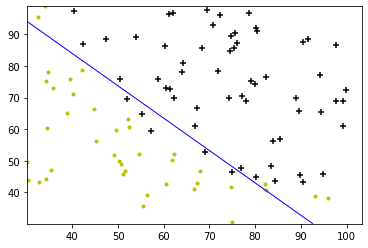

Porcentaje aciertos:  89.0 %


In [47]:
# Dibuja la frontera
pinta_frontera_recta(X, Y, theta_opt);
print("Porcentaje aciertos: ", accuracy(Y, predict(X,Y,theta_opt), m)*100, "%")

## Parte 2: Regresión logística regularizada

In [48]:
# Calcula la función de coste regularizada
def fun_coste_reg(thetas, X, Y, lam):
    
    H = sigmoid(np.dot(X, thetas))
    m = len(Y)
    Term1 = np.matmul(Y, np.log(H))
    Term2 = np.matmul((1 - Y), np.log(1 - H))
    cost = (- 1 / m) * np.sum(Term1 + Term2) + (lam / 2*m) * np.sum(np.square(thetas[1:]))
    
    return cost

In [49]:
# Calcula el gradiente
def gradient_reg(thetas, X, Y, lam):
    
    H = sigmoid(np.dot(X, thetas))
    m = len(Y)
    Dif = H - Y
    grad = (1 / m) * np.matmul(Dif, X) + (lam / 2*m) * thetas

    return grad

In [50]:
def plot_decisionboundary(X, Y, thetas, poly):
    plt.figure()
    
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max
    
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(theta))
    
    h = h.reshape(xx1.shape)
    
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')
    
    plt.savefig("boundary.pdf")
    plt.close()

Text(0, 0.5, 'Microchip test 2')

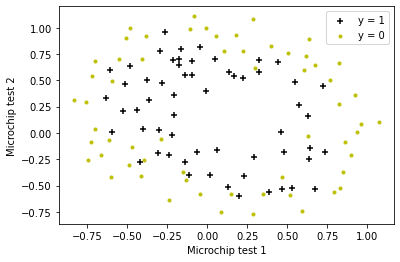

In [55]:
# Cargamos los datos
datos = carga_csv('ex2data2.csv')

# Separamos las variables del resultado
X = datos[:,:-1]
Y = datos[:, -1]

# Añadimos una columna de 1's
X = np.hstack([np.ones([np.shape(X)[0], 1]), X])

# Filas y columnas
m = np.shape(X)[0]
n = np.shape(X)[1]

# Dibuja los ejemplos positivos
pos = np.where (Y == 1)
plt.scatter(X[pos, 1], X[pos, 2], marker='+', c='k' )

# Dibuja los ejemplos negativos
neg = np.where (Y == 0)
plt.scatter(X[neg, 1], X[neg, 2], marker='.', c = 'y')
plt.legend(["y = 1", "y = 0"])
plt.xlabel("Microchip test 1")
plt.ylabel("Microchip test 2")

In [60]:
X = datos[:,:-1]
poly = PolynomialFeatures(6)
X_ext = poly.fit_transform(X)
len(X_ext[0, :])

28

In [67]:
lamlist = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

X = datos[:,:-1]
poly = PolynomialFeatures(6)
X_ext = poly.fit_transform(X)
X_ext = np.hstack([np.ones([np.shape(X)[0], 1]), X])

for lam in lamlist: 

    thetas = np.zeros(n)
    result = opt.fmin_tnc(func=fun_coste_reg, x0=thetas, fprime=gradient_reg, args=(X_ext, Y, lam))
    theta_opt = result[0]
    #coste = fun_coste(theta_opt, X, Y)
    
    plot_decisionboundary(X, Y, thetas, poly)
    #print("Coste óptimo: ", coste)

TypeError: unsupported operand type(s) for *: 'builtin_function_or_method' and 'float'

<Figure size 432x288 with 0 Axes>